# DW_pandas_Task10

## 20210109

DataWhale_pandas组队学习第十章，时序数据，坚持到最后！！！

### 时序中的基本对象

In [1]:
import pandas as pd
import numpy as np

|概念 |                          单元素类型              |    数组类型         |                pandas数据类型|
|:---------|:----------|:-----------|:------------|
|Date times           |           `Timestamp`       |       `DatetimeIndex`  |   `datetime64[ns]`|
|Time deltas          |           `Timedelta`        |      `TimedeltaIndex` |  `timedelta64[ns]`|
|Time spans            |          `Period`           |      `PeriodIndex`   |    `period[freq]`|
|Date offsets          |          `DateOffset`         |    `None`          |    `None`|

时间戳（Date times）、时间差（Time deltas）、时间段（Time spans）、日期偏置（Date offsets）

时间差和时间段的概念有什么区别呢？  
日期时间（Datetime）：带时区的日期时间，类似于标准库的datetime.datetime 。  
时间差（Timedelta）：绝对时间周期，类似于标准库的datetime.timedelta。  
时间段（Timespan）：在某一时点以指定频率定义的时间跨度。  
日期偏移（Dateoffset）：与日历运算对应的时间段，类似 dateutil 的dateutil.relativedelta.relativedelta。  
百度找到的定义，还是有些不太明白，看下去再说

### 时间戳

In [2]:
ts = pd.Timestamp('2020/1/1')
ts

Timestamp('2020-01-01 00:00:00')

In [3]:
pd.Timestamp('2021-1-9 11:00:01')

Timestamp('2021-01-09 11:00:01')

In [4]:
ts.year

2020

In [5]:
ts.second

0

单个时间戳的生成利用pd.Timestamp实现，一般而言的常见日期格式都能被成功地转换  
通过year, month, day, hour, min, second可以获取具体的数值

In [6]:
pd.Timestamp.max

Timestamp('2262-04-11 23:47:16.854775807')

In [7]:
pd.Timestamp.min

Timestamp('1677-09-21 00:12:43.145225')

In [8]:
pd.Timestamp.max.year - pd.Timestamp.min.year

585

在`pandas`中，时间戳的最小精度为纳秒`ns`，由于使用了64位存储，可以表示的时间范围大约可以如下计算：
$$\rm Time\,Range = \frac{2^{64}}{10^9\times 60\times 60\times 24\times 365} \approx 585 (Years)$$
通过`pd.Timestamp.max`和`pd.Timestamp.min`可以获取时间戳表示的范围，可以看到确实表示的区间年数大小正如上述计算结果

In [9]:
pd.to_datetime(['2020-1-1', '2020-1-3', '2020-1-6'])

DatetimeIndex(['2020-01-01', '2020-01-03', '2020-01-06'], dtype='datetime64[ns]', freq=None)

In [10]:
df = pd.read_csv('../data/learn_pandas.csv')
s = pd.to_datetime(df.Test_Date)
s.head()

0   2019-10-05
1   2019-09-04
2   2019-09-12
3   2020-01-03
4   2019-11-06
Name: Test_Date, dtype: datetime64[ns]

In [11]:
# 在极少数情况，时间戳的格式不满足转换时，可以强制使用format进行匹配
temp = pd.to_datetime(['2020\\1\\1','2020\\1\\3'],format='%Y\\%m\\%d')
temp

DatetimeIndex(['2020-01-01', '2020-01-03'], dtype='datetime64[ns]', freq=None)

一组时间戳可以组成时间序列，可以用to_datetime和date_range来生成。其中，to_datetime能够把一列时间戳格式的对象转换成为datetime64[ns]类型的时间序列

In [12]:
# 注意上面由于传入的是列表，而非pandas内部的Series，因此返回的是DatetimeIndex，如果想要转为datetime64[ns]的序列，需要显式用Series转化
pd.Series(temp).head()

0   2020-01-01
1   2020-01-03
dtype: datetime64[ns]

In [13]:
# 把表的多列时间属性拼接转为时间序列的to_datetime操作，此时的列名必须和以下给定的时间关键词列名一致
df_date_cols = pd.DataFrame({'year': [2020, 2020],
                             'month': [1, 1],
                             'day': [1, 2],
                             'hour': [10, 20],
                             'minute': [30, 50],
                             'second': [20, 40]})
pd.to_datetime(df_date_cols)

0   2020-01-01 10:30:20
1   2020-01-02 20:50:40
dtype: datetime64[ns]

In [14]:
pd.date_range('2020-1-1','2020-1-21', freq='5D')   # 两端包含在内

DatetimeIndex(['2020-01-01', '2020-01-06', '2020-01-11', '2020-01-16',
               '2020-01-21'],
              dtype='datetime64[ns]', freq='5D')

In [15]:
pd.date_range('2020-1-1','2020-2-28', freq='10D')

DatetimeIndex(['2020-01-01', '2020-01-11', '2020-01-21', '2020-01-31',
               '2020-02-10', '2020-02-20'],
              dtype='datetime64[ns]', freq='10D')

In [16]:
pd.date_range('2020-1-1', '2020-2-28', periods=6)   # 这个是根据时间戳个数平均间隔生成

DatetimeIndex(['2020-01-01 00:00:00', '2020-01-12 14:24:00',
               '2020-01-24 04:48:00', '2020-02-04 19:12:00',
               '2020-02-16 09:36:00', '2020-02-28 00:00:00'],
              dtype='datetime64[ns]', freq=None)

date_range是一种生成连续间隔时间的一种方法，其重要的参数为start, end, freq, periods，它们分别表示开始时间，结束时间，时间间隔，时间戳个数。其中，四个中的三个参数决定了，那么剩下的一个就随之确定了。这里要注意，开始或结束日期如果作为端点则它会被包含

#### 【练一练】
`Timestamp`上定义了一个`value`属性，其返回的整数值代表了从1970年1月1日零点到给定时间戳相差的纳秒数，请利用这个属性构造一个随机生成给定日期区间内日期序列的函数。

In [17]:
pd.Timestamp('2020/1/2').value

1577923200000000000

In [18]:
def stime(a, b):
    aa = pd.Timestamp(a).value
    bb = pd.Timestamp(b).value
    cc = pd.to_datetime(pd.Series([aa, bb]))
    return cc
stime('2011/1/1', '2012/1/1')

0   2011-01-01
1   2012-01-01
dtype: datetime64[ns]

没完全理解题义，是不是这样的意思？

In [19]:
s = pd.Series(np.random.rand(5), index=pd.to_datetime(['2020-1-%d'%i for i in range(1,10,2)]))
s.head()

2020-01-01    0.530967
2020-01-03    0.836531
2020-01-05    0.537288
2020-01-07    0.244730
2020-01-09    0.931354
dtype: float64

In [20]:
s.asfreq('D').head()

2020-01-01    0.530967
2020-01-02         NaN
2020-01-03    0.836531
2020-01-04         NaN
2020-01-05    0.537288
Freq: D, dtype: float64

In [21]:
s.asfreq('12H').head()

2020-01-01 00:00:00    0.530967
2020-01-01 12:00:00         NaN
2020-01-02 00:00:00         NaN
2020-01-02 12:00:00         NaN
2020-01-03 00:00:00    0.836531
Freq: 12H, dtype: float64

In [22]:
s.asfreq('10H')

2020-01-01 00:00:00    0.530967
2020-01-01 10:00:00         NaN
2020-01-01 20:00:00         NaN
2020-01-02 06:00:00         NaN
2020-01-02 16:00:00         NaN
2020-01-03 02:00:00         NaN
2020-01-03 12:00:00         NaN
2020-01-03 22:00:00         NaN
2020-01-04 08:00:00         NaN
2020-01-04 18:00:00         NaN
2020-01-05 04:00:00         NaN
2020-01-05 14:00:00         NaN
2020-01-06 00:00:00         NaN
2020-01-06 10:00:00         NaN
2020-01-06 20:00:00         NaN
2020-01-07 06:00:00         NaN
2020-01-07 16:00:00         NaN
2020-01-08 02:00:00         NaN
2020-01-08 12:00:00         NaN
2020-01-08 22:00:00         NaN
Freq: 10H, dtype: float64

In [23]:
s.asfreq('4D')

2020-01-01    0.530967
2020-01-05    0.537288
2020-01-09    0.931354
Freq: 4D, dtype: float64

改变序列采样频率asfreq，它能够根据给定的freq对序列进行类似于reindex的操作，它的取值范围不会超过原数据，保留在这一时间范围内。

#### 【练一练】
前面提到了`datetime64[ns]`本质上可以理解为一个大整数，对于一个该类型的序列，可以使用`max, min, mean`，来取得最大时间戳、最小时间戳和“平均”时间戳。

In [24]:
demo = pd.to_datetime(df.Test_Date)
demo.head()

0   2019-10-05
1   2019-09-04
2   2019-09-12
3   2020-01-03
4   2019-11-06
Name: Test_Date, dtype: datetime64[ns]

In [25]:
demo.max()

Timestamp('2020-01-08 00:00:00')

In [26]:
demo.min()

Timestamp('2019-09-02 00:00:00')

In [27]:
demo.mean()

Timestamp('2019-11-03 18:43:12')

本质上的大整数是不是理解为value值的意思，内部存储还是以该方式保存？

In [28]:
s = pd.Series(pd.date_range('2020-1-1','2020-1-3', freq='D'))
s.dt.date

0    2020-01-01
1    2020-01-02
2    2020-01-03
dtype: object

In [29]:
s.dt.hour

0    0
1    0
2    0
dtype: int64

In [30]:
s.dt.days_in_month

0    31
1    31
2    31
dtype: int64

In [31]:
s.dt.dayofweek

0    2
1    3
2    4
dtype: int64

In [32]:
s.dt.month_name()

0    January
1    January
2    January
dtype: object

In [33]:
s.dt.day_name()

0    Wednesday
1     Thursday
2       Friday
dtype: object

如同`category, string`的序列上定义了`cat, str`来完成分类数据和文本数据的操作，在时序类型的序列上定义了`dt`对象来完成许多时间序列的相关操作。这里对于`datetime64[ns]`类型而言，可以大致分为三类操作：取出时间相关的属性、判断时间戳是否满足条件、取整操作。

第一类操作的常用属性包括：`date, time, year, month, day, hour, minute, second, microsecond, nanosecond, dayofweek, dayofyear, weekofyear, daysinmonth, quarter`，其中`daysinmonth, quarter`分别表示月中的第几天和季度。

In [34]:
s.dt.is_quarter_start

0     True
1    False
2    False
dtype: bool

In [35]:
s.dt.isocalendar()   # 生成日历列表？

,year,week,day
0,2020,1,3
1,2020,1,4
2,2020,1,5


第二类判断操作主要用于测试是否为月/季/年的第一天或者最后一天

In [36]:
s = pd.Series(pd.date_range('2020-1-1 20:35:00', '2020-1-1 22:35:00', freq='45min'))
s

0   2020-01-01 20:35:00
1   2020-01-01 21:20:00
2   2020-01-01 22:05:00
dtype: datetime64[ns]

In [37]:
s.dt.round('1H')   # 四舍五入取整

0   2020-01-01 21:00:00
1   2020-01-01 21:00:00
2   2020-01-01 22:00:00
dtype: datetime64[ns]

In [38]:
s.dt.ceil('1H')   # 大于即向上取

0   2020-01-01 21:00:00
1   2020-01-01 22:00:00
2   2020-01-01 23:00:00
dtype: datetime64[ns]

In [39]:
s.dt.floor('1H')   # 按前取，不管大小

0   2020-01-01 20:00:00
1   2020-01-01 21:00:00
2   2020-01-01 22:00:00
dtype: datetime64[ns]

第三类的取整操作包含round, ceil, floor，它们的公共参数为freq，常用的包括H, min, S（小时、分钟、秒）

In [40]:
s = pd.Series(np.random.randint(2,size=366), index=pd.date_range('2020-01-01','2020-12-31'))
idx = pd.Series(s.index).dt
s.head()

2020-01-01    1
2020-01-02    0
2020-01-03    0
2020-01-04    1
2020-01-05    1
Freq: D, dtype: int32

In [41]:
s[(idx.is_month_start|idx.is_month_end).values].head()  # 每月的第一天或最后一天

2020-01-01    1
2020-01-31    1
2020-02-01    0
2020-02-29    0
2020-03-01    0
dtype: int32

In [42]:
s[idx.dayofweek.isin([5,6]).values].head()   # 双休日

2020-01-04    1
2020-01-05    1
2020-01-11    1
2020-01-12    0
2020-01-18    1
dtype: int32

In [43]:
s['20200101']   # 取单日值，格式自动转换

1

In [44]:
s['2020-05':'2020-7-15'].head()   #  取两个时间之间的值

2020-05-01    0
2020-05-02    1
2020-05-03    1
2020-05-04    0
2020-05-05    1
Freq: D, dtype: int32

In [45]:
s['2020-05':'2020-7-15':3].tail()    # 列表切片操作

2020-07-03    0
2020-07-06    1
2020-07-09    0
2020-07-12    0
2020-07-15    0
Freq: 3D, dtype: int32

一般而言，时间戳序列作为索引使用。如果想要选出某个子时间戳序列，第一类方法是利用dt对象和布尔条件联合使用，另一种方式是利用切片，后者常用于连续时间戳。

### 时间差

In [46]:
pd.Timestamp('20200102 08:00:00')-pd.Timestamp('20200101 07:35:00')

Timedelta('1 days 00:25:00')

In [47]:
pd.Timedelta(days=1, minutes=25)

Timedelta('1 days 00:25:00')

In [48]:
pd.Timedelta('1 days 25 minutes')   # 按字符串生成

Timedelta('1 days 00:25:00')

In [49]:
pd.Timedelta('1 day 25 min')   # 识别能力不错

Timedelta('1 days 00:25:00')

In [50]:
s = pd.to_timedelta(df.Time_Record)   # 生成时间差序列的主要方式是pd.to_timedelta，其类型为timedelta64[ns]
s.head()

0   0 days 00:04:34
1   0 days 00:04:20
2   0 days 00:05:22
3   0 days 00:04:08
4   0 days 00:05:22
Name: Time_Record, dtype: timedelta64[ns]

In [51]:
pd.timedelta_range('0s', '1000s', freq='6min')   # 与date_range一样，时间差序列也可以用timedelta_range来生成，它们两者具有一致的参数

TimedeltaIndex(['0 days 00:00:00', '0 days 00:06:00', '0 days 00:12:00'], dtype='timedelta64[ns]', freq='6T')

In [52]:
pd.timedelta_range('0s', '2000s', periods=3)

TimedeltaIndex(['0 days 00:00:00', '0 days 00:16:40', '0 days 00:33:20'], dtype='timedelta64[ns]', freq=None)

In [53]:
s.dt.seconds.head()   # 天数取余后的秒数

0    274
1    260
2    322
3    248
4    322
Name: Time_Record, dtype: int64

In [54]:
s.dt.total_seconds().head()   # 取总秒数

0    274.0
1    260.0
2    322.0
3    248.0
4    322.0
Name: Time_Record, dtype: float64

In [55]:
pd.to_timedelta(df.Time_Record).dt.round('min').head()   # 对数据取整

0   0 days 00:05:00
1   0 days 00:04:00
2   0 days 00:05:00
3   0 days 00:04:00
4   0 days 00:05:00
Name: Time_Record, dtype: timedelta64[ns]

对于Timedelta序列，同样也定义了dt对象，上面主要定义了的属性包括days, seconds, mircroseconds, nanoseconds，它们分别返回了对应的时间差特征。需要注意的是，这里的seconds不是指单纯的秒，而是对天数取余后剩余的秒数

In [56]:
td1 = pd.Timedelta(days=1)
td2 = pd.Timedelta(days=3)
ts = pd.Timestamp('20200101')
td1 * 2

Timedelta('2 days 00:00:00')

In [57]:
td1- td2

Timedelta('-2 days +00:00:00')

In [58]:
ts - (td1-td2)*5   # 负负得正即为加

Timestamp('2020-01-11 00:00:00')

In [59]:
td1 = pd.timedelta_range(start='1 days', periods=5)
td2 = pd.timedelta_range(start='12 hours', freq='2H', periods=5)
ts = pd.date_range('20200101', '20200105')
td1 * 5

TimedeltaIndex(['5 days', '10 days', '15 days', '20 days', '25 days'], dtype='timedelta64[ns]', freq='5D')

In [60]:
td1

TimedeltaIndex(['1 days', '2 days', '3 days', '4 days', '5 days'], dtype='timedelta64[ns]', freq='D')

In [61]:
td2

TimedeltaIndex(['0 days 12:00:00', '0 days 14:00:00', '0 days 16:00:00',
                '0 days 18:00:00', '0 days 20:00:00'],
               dtype='timedelta64[ns]', freq='2H')

In [62]:
ts

DatetimeIndex(['2020-01-01', '2020-01-02', '2020-01-03', '2020-01-04',
               '2020-01-05'],
              dtype='datetime64[ns]', freq='D')

In [63]:
td1 * pd.Series(list(range(5)))

0    0 days
1    2 days
2    6 days
3   12 days
4   20 days
dtype: timedelta64[ns]

In [64]:
td2 + ts   # 逐个相加

DatetimeIndex(['2020-01-01 12:00:00', '2020-01-02 14:00:00',
               '2020-01-03 16:00:00', '2020-01-04 18:00:00',
               '2020-01-05 20:00:00'],
              dtype='datetime64[ns]', freq=None)

时间差支持的常用运算有三类：与标量的乘法运算、与时间戳的加减法运算、与时间差的加减法与除法运算，这些运算都可以移植到时间差的序列上

### 日期偏置

In [65]:
pd.Timestamp('20201231') + pd.offsets.WeekOfMonth(week=0,weekday=0)   # 求2021年1月第一个周一的日期

Timestamp('2021-01-04 00:00:00')

In [66]:
pd.Timestamp('20201231') + pd.offsets.WeekOfMonth(week=1,weekday=1)    # 第二个周二，week,weekday的值从0开始

Timestamp('2021-01-12 00:00:00')

In [67]:
pd.Timestamp('20200907') + pd.offsets.BDay(30)   # BDay为之后的工作日

Timestamp('2020-10-19 00:00:00')

In [68]:
pd.Timestamp('20200907') + pd.offsets.Day(30)   # Day为之后的日

Timestamp('2020-10-07 00:00:00')

In [69]:
pd.Timestamp('20200831') - pd.offsets.WeekOfMonth(week=0,weekday=0)  # 减获取之前的日期

Timestamp('2020-08-03 00:00:00')

In [70]:
pd.Timestamp('20200907') + pd.offsets.MonthEnd()   # 本月的结束日期

Timestamp('2020-09-30 00:00:00')

In [71]:
pd.Timestamp('20200907') - pd.offsets.MonthEnd()   # 减回到上一月

Timestamp('2020-08-31 00:00:00')

日期偏置是一种和日历相关的特殊时间差，主要是针对日历进行计算，这在实际中应该很有用

In [72]:
my_filter = pd.offsets.CDay(n=1,weekmask='Wed Fri',holidays=['20200109'])
dr = pd.date_range('20200108', '20200111')
dr.to_series().dt.dayofweek

2020-01-08    2
2020-01-09    3
2020-01-10    4
2020-01-11    5
Freq: D, dtype: int64

In [73]:
[i + my_filter for i in dr]

[Timestamp('2020-01-10 00:00:00'),
 Timestamp('2020-01-10 00:00:00'),
 Timestamp('2020-01-15 00:00:00'),
 Timestamp('2020-01-15 00:00:00')]

在文档罗列的Offset中，需要介绍一个特殊的Offset对象CDay，其中的holidays, weekmask参数能够分别对自定义的日期和星期进行过滤，前者传入了需要过滤的日期列表，后者传入的是三个字母的星期缩写构成的星期字符串，其作用是只保留字符串中出现的星期。  
上面的例子中，n表示增加一天CDay，dr中的第一天为20200108，但由于下一天20200109被排除了，并且20200110是合法的周五，因此转为20200110，其他后面的日期处理类似。  
感觉挺复杂的，holidays是将数据过滤了，而weekmask是将数据保留了，为何这参数设定这么怪，干吗不都是过滤或者保留？

In [74]:
pd.date_range('20200101','20200331', freq='MS') # 月初

DatetimeIndex(['2020-01-01', '2020-02-01', '2020-03-01'], dtype='datetime64[ns]', freq='MS')

In [75]:
pd.date_range('20200101','20200331', freq='M') # 月末

DatetimeIndex(['2020-01-31', '2020-02-29', '2020-03-31'], dtype='datetime64[ns]', freq='M')

In [76]:
pd.date_range('20200101','20200110', freq='B') # 工作日

DatetimeIndex(['2020-01-01', '2020-01-02', '2020-01-03', '2020-01-06',
               '2020-01-07', '2020-01-08', '2020-01-09', '2020-01-10'],
              dtype='datetime64[ns]', freq='B')

In [77]:
pd.date_range('20200101','20200201', freq='W-MON') # 周一

DatetimeIndex(['2020-01-06', '2020-01-13', '2020-01-20', '2020-01-27'], dtype='datetime64[ns]', freq='W-MON')

In [78]:
pd.date_range('20200101','20200201', freq='WOM-1MON') # 每月第一个周一

DatetimeIndex(['2020-01-06'], dtype='datetime64[ns]', freq='WOM-1MON')

上面的这些字符串，等价于使用如下的Offset对象：

In [79]:
pd.date_range('20200101','20200331', freq=pd.offsets.MonthBegin())   # 月初

DatetimeIndex(['2020-01-01', '2020-02-01', '2020-03-01'], dtype='datetime64[ns]', freq='MS')

In [80]:
pd.date_range('20200101','20200331', freq=pd.offsets.MonthEnd())   # 月末

DatetimeIndex(['2020-01-31', '2020-02-29', '2020-03-31'], dtype='datetime64[ns]', freq='M')

In [81]:
pd.date_range('20200101','20200110', freq=pd.offsets.BDay())   # 工作日

DatetimeIndex(['2020-01-01', '2020-01-02', '2020-01-03', '2020-01-06',
               '2020-01-07', '2020-01-08', '2020-01-09', '2020-01-10'],
              dtype='datetime64[ns]', freq='B')

In [82]:
pd.date_range('20200101','20200201', freq=pd.offsets.CDay(weekmask='Mon'))   # 周一

DatetimeIndex(['2020-01-06', '2020-01-13', '2020-01-20', '2020-01-27'], dtype='datetime64[ns]', freq='C')

In [83]:
pd.date_range('20200101','20200201', freq=pd.offsets.WeekOfMonth(week=0,weekday=0))   # 每月的第一个周一

DatetimeIndex(['2020-01-06'], dtype='datetime64[ns]', freq='WOM-1MON')

前面提到了关于date_range的freq取值可用Offset对象，同时在pandas中几乎每一个Offset对象绑定了日期偏置字符串（frequencies strings/offset aliases），可以指定Offset对应的字符串来替代使用。

freq的参数太多，百度了一下：

B business day frequency 工作日频率  
C custom business day frequency 自定义工作日频率  
D calendar day frequency 日历日频率  
W weekly frequency 每周频率  
M month end frequency 月末频率  
SM semi-month end frequency (15th and end of month) 半月结束频率（15日和月末）  
BM business month end frequency 营业月结束频率  
CBM custom business month end frequency 自定义营业月结束频率  
MS month start frequency 月开始频率  
SMS semi-month start frequency (1st and 15th) 半月开始频率（第1天和第15天）  
BMS business month start frequency 营业月开始频率  
CBMS custom business month start frequency 自定义营业月开始频率  
Q quarter end frequency 四分之一结束频率  
BQ business quarter end frequency 业务季度结束频率  
QS quarter start frequency 季度开始频率  
BQS business quarter start frequency 业务季开始频率  
A, Y year end frequency 年终频率  
BA, BY business year end frequency 业务年度结束频率  
AS, YS year start frequency 年开始频率  
BAS, BYS business year start frequency 营业年度开始频率  
BH business hour frequency 营业时间频率  
H hourly frequency 每小时频率  
T, min minutely frequency 分钟的频率  
S secondly frequency 秒钟的频率  
L, ms milliseconds 毫秒  
U, us microseconds 微妙  
N nanoseconds 纳秒

### 时序中的滑窗与分组

In [84]:
import matplotlib.pyplot as plt
idx = pd.date_range('20200101', '20201231', freq='B')   # 根据工作日频率
np.random.seed(2020)
data = np.random.randint(-1,2,len(idx)).cumsum() # 随机游动构造模拟序列
s = pd.Series(data,index=idx)
s.head()

2020-01-01   -1
2020-01-02   -2
2020-01-03   -1
2020-01-06   -1
2020-01-07   -2
Freq: B, dtype: int32

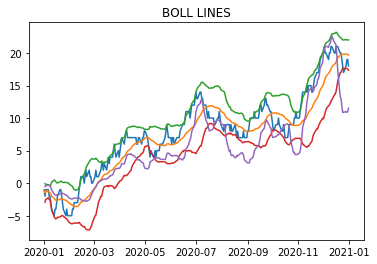

In [85]:
r = s.rolling('30D')
plt.plot(s)
plt.title('BOLL LINES')
plt.plot(r.mean())
plt.plot(r.mean()+r.std()*2)
plt.plot(r.mean()-r.std()*2)
plt.plot(r.mean()*r.std()/2)

所谓时序的滑窗函数，即把滑动窗口用freq关键词代替，上面给出一个具体的应用案例：在股票市场中有一个指标为BOLL指标，它由中轨线、上轨线、下轨线这三根线构成，具体的计算方法分别是N日均值线、N日均值加两倍N日标准差线、N日均值减两倍N日标准差线。利用rolling对象计算N=30的BOLL指标，再以此数据来绘图。

In [86]:
s.shift(freq='50D').head()   # 对于shift函数而言，作用在datetime64为索引的序列上时，可以指定freq单位进行滑动

2020-02-20   -1
2020-02-21   -2
2020-02-22   -1
2020-02-25   -1
2020-02-26   -2
dtype: int32

In [87]:
my_series = pd.Series(s.index)
my_series.head()

0   2020-01-01
1   2020-01-02
2   2020-01-03
3   2020-01-06
4   2020-01-07
dtype: datetime64[ns]

In [88]:
my_series.diff(1).head()

0      NaT
1   1 days
2   1 days
3   3 days
4   1 days
dtype: timedelta64[ns]

datetime64[ns]的序列进行diff后就能够得到timedelta64[ns]的序列，这能够使用户方便地观察有序时间序列的间隔

In [89]:
s.resample('10D').mean().head()   # 对上面的序列计算每10天的均值

2020-01-01   -2.000000
2020-01-11   -3.166667
2020-01-21   -3.625000
2020-01-31   -4.000000
2020-02-10   -0.375000
Freq: 10D, dtype: float64

In [90]:
s.resample('10D').apply(lambda x:x.max()-x.min()).head()   # 如果没有内置定义的处理函数，可以通过apply方法自定义

2020-01-01    3
2020-01-11    4
2020-01-21    4
2020-01-31    2
2020-02-10    4
Freq: 10D, dtype: int32

In [91]:
idx = pd.date_range('20200101 8:26:35', '20200101 9:31:58', freq='77s')
data = np.random.randint(-1,2,len(idx)).cumsum()
s = pd.Series(data,index=idx)
s.head()

2020-01-01 08:26:35   -1
2020-01-01 08:27:52   -1
2020-01-01 08:29:09   -2
2020-01-01 08:30:26   -3
2020-01-01 08:31:43   -4
Freq: 77S, dtype: int32

In [92]:
# 对应的第一个组起始值为08:24:00，其是从当天0点增加72个freq=7 min得到的，如果再增加一个freq则超出了序列的最小时间戳08:26:35
s.resample('7min').mean().head()

2020-01-01 08:24:00   -1.750000
2020-01-01 08:31:00   -2.600000
2020-01-01 08:38:00   -2.166667
2020-01-01 08:45:00    0.200000
2020-01-01 08:52:00    2.833333
Freq: 7T, dtype: float64

In [93]:
# 有时候，用户希望从序列的最小时间戳开始依次增加freq进行分组，此时可以指定origin参数为start
s.resample('7min', origin='start').mean().head()

2020-01-01 08:26:35   -2.333333
2020-01-01 08:33:35   -2.400000
2020-01-01 08:40:35   -1.333333
2020-01-01 08:47:35    1.200000
2020-01-01 08:54:35    3.166667
Freq: 7T, dtype: float64

In [94]:
s = pd.Series(np.random.randint(2,size=366), index=pd.date_range('2020-01-01', '2020-12-31'))
s.resample('M').mean().head()   # 取最后一个时间戳

2020-01-31    0.451613
2020-02-29    0.448276
2020-03-31    0.516129
2020-04-30    0.566667
2020-05-31    0.451613
Freq: M, dtype: float64

In [95]:
# 在返回值中，要注意索引一般是取组的第一个时间戳，但M, A, Q, BM, BA, BQ, W这七个是取对应区间的最后一个时间戳
s.resample('MS').mean().head()   # 取第一个时间戳

2020-01-01    0.451613
2020-02-01    0.448276
2020-03-01    0.516129
2020-04-01    0.566667
2020-05-01    0.451613
Freq: MS, dtype: float64

重采样对象resample和第四章中分组对象groupby的用法类似，前者是针对时间序列的分组计算而设计的分组对象。  
在resample中要特别注意组边界值的处理情况，默认情况下起始值的计算方法是从最小值时间戳对应日期的午夜00:00:00开始增加freq，直到不超过该最小时间戳的最大时间戳，由此对应的时间戳为起始值，然后每次累加freq参数作为分割结点进行分组，区间情况为左闭右开。

## 练习
### Ex1：太阳辐射数据集

现有一份关于太阳辐射的数据集：

In [96]:
df = pd.read_csv('../data/solar.csv', usecols=['Data','Time','Radiation','Temperature'])
df.head(3)

,Data,Time,Radiation,Temperature
0,9/29/2016 12:00:00 AM,23:55:26,1.21,48
1,9/29/2016 12:00:00 AM,23:50:23,1.21,48
2,9/29/2016 12:00:00 AM,23:45:26,1.23,48


1. 将`Datetime, Time`合并为一个时间列`Datetime`，同时把它作为索引后排序。
2. 每条记录时间的间隔显然并不一致，请解决如下问题：
* 找出间隔时间的前三个最大值所对应的三组时间戳。
* 是否存在一个大致的范围，使得绝大多数的间隔时间都落在这个区间中？如果存在，请对此范围内的样本间隔秒数画出柱状图，设置`bins=50`。
3. 求如下指标对应的`Series`：
* 温度与辐射量的6小时滑动相关系数
* 以三点、九点、十五点、二十一点为分割，该观测所在时间区间的温度均值序列
* 每个观测6小时前的辐射量（一般而言不会恰好取到，此时取最近时间戳对应的辐射量）

In [97]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32686 entries, 0 to 32685
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Data         32686 non-null  object 
 1   Time         32686 non-null  object 
 2   Radiation    32686 non-null  float64
 3   Temperature  32686 non-null  int64  
dtypes: float64(1), int64(1), object(2)
memory usage: 1021.6+ KB


In [98]:
pd.to_datetime(df.Data)

0       2016-09-29
1       2016-09-29
2       2016-09-29
3       2016-09-29
4       2016-09-29
           ...    
32681   2016-12-01
32682   2016-12-01
32683   2016-12-01
32684   2016-12-01
32685   2016-12-01
Name: Data, Length: 32686, dtype: datetime64[ns]

In [99]:
s = pd.to_datetime(df.Time)   # 尝试用转化相加，结果是错的
s

0       2021-01-10 23:55:26
1       2021-01-10 23:50:23
2       2021-01-10 23:45:26
3       2021-01-10 23:40:21
4       2021-01-10 23:35:24
                ...        
32681   2021-01-10 00:20:04
32682   2021-01-10 00:15:01
32683   2021-01-10 00:10:01
32684   2021-01-10 00:05:02
32685   2021-01-10 00:00:02
Name: Time, Length: 32686, dtype: datetime64[ns]

In [100]:
s.dt.time   # 转换提取了一下，也是不能相加

0        23:55:26
1        23:50:23
2        23:45:26
3        23:40:21
4        23:35:24
           ...   
32681    00:20:04
32682    00:15:01
32683    00:10:01
32684    00:05:02
32685    00:00:02
Name: Time, Length: 32686, dtype: object

In [101]:
df['date'] = pd.to_datetime(df.Data) + pd.to_timedelta(df.Time)   # 知识掌握的不够，这个不是理解出来，而是凑着试出来的😣
df.head()

,Data,Time,Radiation,Temperature,date
0,9/29/2016 12:00:00 AM,23:55:26,1.21,48,2016-09-29 23:55:26
1,9/29/2016 12:00:00 AM,23:50:23,1.21,48,2016-09-29 23:50:23
2,9/29/2016 12:00:00 AM,23:45:26,1.23,48,2016-09-29 23:45:26
3,9/29/2016 12:00:00 AM,23:40:21,1.21,48,2016-09-29 23:40:21
4,9/29/2016 12:00:00 AM,23:35:24,1.17,48,2016-09-29 23:35:24


In [102]:
df.index = df.date

In [103]:
df.sort_index()

,Data,Time,Radiation,Temperature,date
date,,,,,
2016-09-01 00:00:08,9/1/2016 12:00:00 AM,00:00:08,2.58,51,2016-09-01 00:00:08
2016-09-01 00:05:10,9/1/2016 12:00:00 AM,00:05:10,2.83,51,2016-09-01 00:05:10
2016-09-01 00:20:06,9/1/2016 12:00:00 AM,00:20:06,2.16,51,2016-09-01 00:20:06
2016-09-01 00:25:05,9/1/2016 12:00:00 AM,00:25:05,2.21,51,2016-09-01 00:25:05
2016-09-01 00:30:09,9/1/2016 12:00:00 AM,00:30:09,2.25,51,2016-09-01 00:30:09
...,...,...,...,...,...
2016-12-31 23:35:02,12/31/2016 12:00:00 AM,23:35:02,1.22,41,2016-12-31 23:35:02
2016-12-31 23:40:01,12/31/2016 12:00:00 AM,23:40:01,1.21,41,2016-12-31 23:40:01
2016-12-31 23:45:04,12/31/2016 12:00:00 AM,23:45:04,1.21,42,2016-12-31 23:45:04


解答的有些乱，应该就是这样的意思，每道题花的时间都很长，没精力，无法再做，只能是匆匆过下，期末的练习我想是完成不了了，尝试一下吧！

In [104]:
df.date.max

<bound method Series.max of date
2016-09-29 23:55:26   2016-09-29 23:55:26
2016-09-29 23:50:23   2016-09-29 23:50:23
2016-09-29 23:45:26   2016-09-29 23:45:26
2016-09-29 23:40:21   2016-09-29 23:40:21
2016-09-29 23:35:24   2016-09-29 23:35:24
                              ...        
2016-12-01 00:20:04   2016-12-01 00:20:04
2016-12-01 00:15:01   2016-12-01 00:15:01
2016-12-01 00:10:01   2016-12-01 00:10:01
2016-12-01 00:05:02   2016-12-01 00:05:02
2016-12-01 00:00:02   2016-12-01 00:00:02
Name: date, Length: 32686, dtype: datetime64[ns]>

In [105]:
df.date.min

<bound method Series.min of date
2016-09-29 23:55:26   2016-09-29 23:55:26
2016-09-29 23:50:23   2016-09-29 23:50:23
2016-09-29 23:45:26   2016-09-29 23:45:26
2016-09-29 23:40:21   2016-09-29 23:40:21
2016-09-29 23:35:24   2016-09-29 23:35:24
                              ...        
2016-12-01 00:20:04   2016-12-01 00:20:04
2016-12-01 00:15:01   2016-12-01 00:15:01
2016-12-01 00:10:01   2016-12-01 00:10:01
2016-12-01 00:05:02   2016-12-01 00:05:02
2016-12-01 00:00:02   2016-12-01 00:00:02
Name: date, Length: 32686, dtype: datetime64[ns]>

In [106]:
df.date.dt.second

date
2016-09-29 23:55:26    26
2016-09-29 23:50:23    23
2016-09-29 23:45:26    26
2016-09-29 23:40:21    21
2016-09-29 23:35:24    24
                       ..
2016-12-01 00:20:04     4
2016-12-01 00:15:01     1
2016-12-01 00:10:01     1
2016-12-01 00:05:02     2
2016-12-01 00:00:02     2
Name: date, Length: 32686, dtype: int64

想不出所以然了，先退下吧😭